In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
from dataset import *

In [5]:
# Define a custom dataset class
class CorrectionImageDataset(Dataset):
    def __init__(self, root_dir, transform=None, file_list=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.file_list[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image


In [6]:
# Define a custom dataset class
class CorrectionImageDataset2(Dataset):
    def __init__(self, file_list, transform=None, ):
        self.transform = transform
        self.file_list = file_list

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = self.file_list[idx]
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image


In [8]:
!pip install -U albumentations

  Obtaining dependency information for albumentations from https://files.pythonhosted.org/packages/9b/f6/c486cedb4f75147232f32ec4c97026714cfef7c7e247a1f0427bc5489f66/albumentations-1.3.1-py3-none-any.whl.metadata
  Using cached albumentations-1.3.1-py3-none-any.whl.metadata (34 kB)
  Obtaining dependency information for scikit-image>=0.16.1 from https://files.pythonhosted.org/packages/86/f0/18895318109f9b508f2310f136922e455a453550826a8240b412063c2528/scikit_image-0.22.0-cp310-cp310-win_amd64.whl.metadata
  Using cached scikit_image-0.22.0-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Obtaining dependency information for opencv-python-headless>=4.1.1 from https://files.pythonhosted.org/packages/e3/10/31b27a7473043eb5317f698ede00e7e129b2de378903bfe0bb4d785a7baf/opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency i

ERROR: Could not install packages due to an OSError: [WinError 5] Adgang nægtet: 'C:\\Users\\tobia\\anaconda3\\envs\\nerf\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
import glob
import albumentations as A 

In [11]:
input_images = glob.glob('data/training/INPUT_IMAGES/*P1.5.JPG')

In [12]:
train_dataset = CorrectionImageDataset('data/training/GT_IMAGES')
validation_dataset = CorrectionImageDataset('data/validation/GT_IMAGES')

# test set must be done with the same data 

In [13]:
train_dataset = CorrectionImageDataset2(input_images)
validation_dataset = CorrectionImageDataset2(input_images) # WATCH OUT


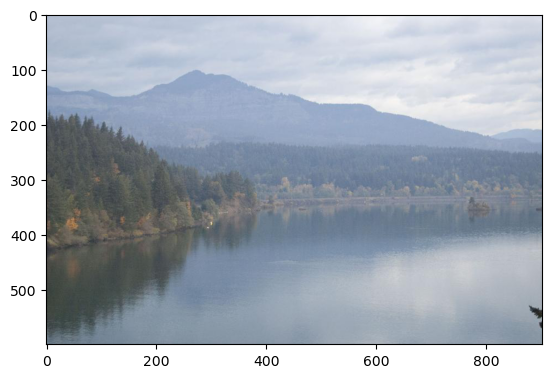

In [14]:
image = np.array(train_dataset.__getitem__(40))
plt.imshow(image)

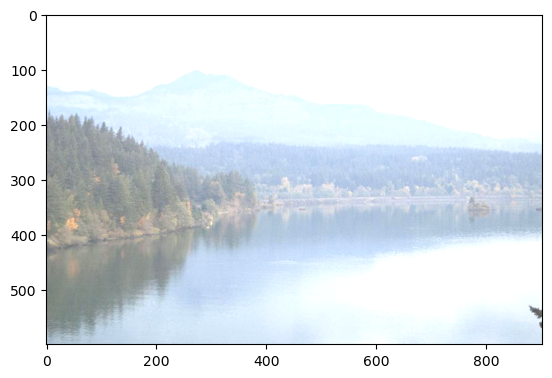

In [15]:
transform = A.RandomBrightnessContrast(p=1, brightness_limit=(0.2,0.2), contrast_limit=(0.2, 0.2))
augmented_image = transform(image=image)['image']
plt.imshow(augmented_image)


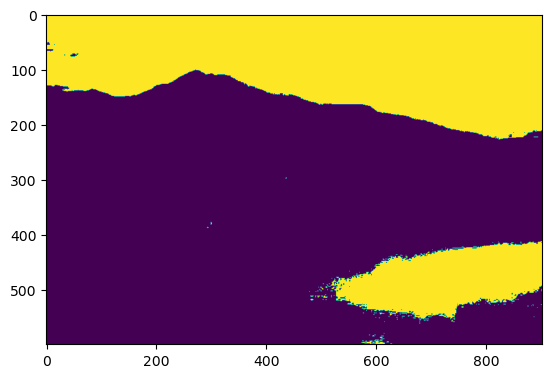

In [16]:
mask = augmented_image.mean(ax is=2) == 255
plt.imshow(mask)

In [17]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return img

In [18]:
plt.imshow(x)

NameError: name 'x' is not defined

In [ ]:
p = increase_brightness(x, 100)

In [ ]:
plt.imshow(p)

In [ ]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
#	return cv2.LUT(image, table)
    return 

In [ ]:
xt = adjust_gamma(x, gamma=20) 

In [ ]:
cv2.convertScaleAbs(x, alpha, beta)

In [19]:
a = 200
xc = np.clip(x+a, 0, 255 ).astype('int32')

NameError: name 'x' is not defined

In [ ]:
plt.imshow(xc)

In [ ]:
plt.imshow(xc200)